In [8]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [9]:
df=pd.read_csv("Customer_Engagement_Predication.csv", low_memory=False)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308911 entries, 0 to 308910
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   unsubs_from      308911 non-null  object
 1   unsubs_date      308911 non-null  object
 2   revenue          308911 non-null  int64 
 3   subs_date        308911 non-null  object
 4   source           308911 non-null  object
 5   country          308911 non-null  object
 6   operator         308911 non-null  object
 7   profile_status   308911 non-null  object
 8   status           308911 non-null  int64 
 9   service_price    308911 non-null  int64 
 10  publisher        308911 non-null  object
 11  adnet            308911 non-null  object
 12  service          308911 non-null  object
 13  success_billing  308911 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 33.0+ MB


In [ ]:
#dropping non-numeric columns as the main priority here is to use numeric values
numeric_columns=df.select_dtypes(include=['float64', 'int64']).columns

In [12]:
df_numeric= df[numeric_columns]

In [13]:
#Standardize the data as it is important for PCA
apply_scaler=StandardScaler()
df_standardized=apply_scaler.fit_transform(df_numeric)

In [15]:
#Implementing PCA algorithm
pca_implementaion=PCA()
pca_result=pca_implementaion.fit_transform(df_standardized)
print("PCA Result: ")
print(pd.DataFrame(pca_result, columns=[f"PC{i+1}" for i in range(pca_result.shape[1])]))


PCA Result: 
             PC1       PC2       PC3       PC4
0      -0.743245 -0.053244  0.022395  0.159948
1      -0.743245 -0.053244  0.022395  0.159948
2      -0.684550 -0.050212  0.128109  0.167708
3      -0.743245 -0.053244  0.022395  0.159948
4      -0.743245 -0.053244  0.022395  0.159948
...          ...       ...       ...       ...
308906 -0.743245 -0.053244  0.022395  0.159948
308907 -0.743245 -0.053244  0.022395  0.159948
308908 -0.743245 -0.053244  0.022395  0.159948
308909 -0.743245 -0.053244  0.022395  0.159948
308910 -0.743245 -0.053244  0.022395  0.159948

[308911 rows x 4 columns]


In [17]:
#PCA EVALUATION METHOD: Reconstruction Error
reconstructed_data=np.dot(pca_result, pca.components_)
error_reconstruction=np.sum(np.square(df_standardized - reconstructed_data))

print(f"Reconstruction Error: {error_reconstruction}")


Reconstruction Error: 6.967170966695865e-24


In [ ]:
#The above very small reconstruction error suggests that the reduced-dimensional 
#representation obtained by the principal components can accurately reconstruct the original data.

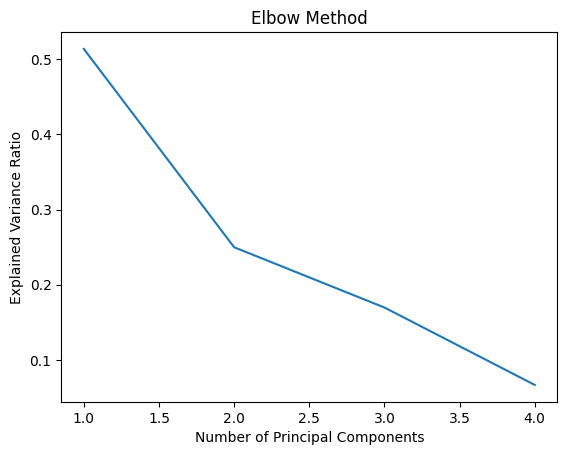

In [18]:
#Elbow method to determine the optimal component number
# Elbow Method
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Elbow Method')
plt.show()


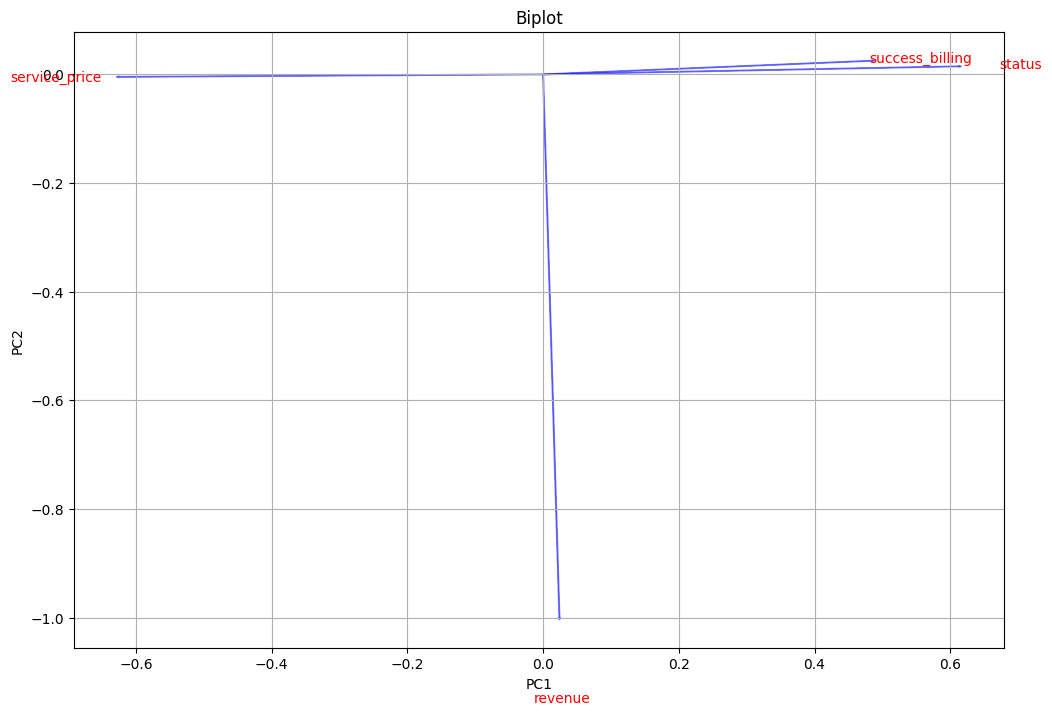

In [25]:
#Biplot for additional evaluationa and visulization
# Biplot (for the first two principal components)
plt.figure(figsize=(12, 8))
for i in range(len(pca.components_)):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='b', alpha=0.5)
    plt.text(pca.components_[0, i]*1.15, pca.components_[1, i]*1.15, df_numeric.columns[i], color='r', ha='center', va='center')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biplot')
plt.grid()
plt.show()
